In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('data/participants3_cleaned.csv')

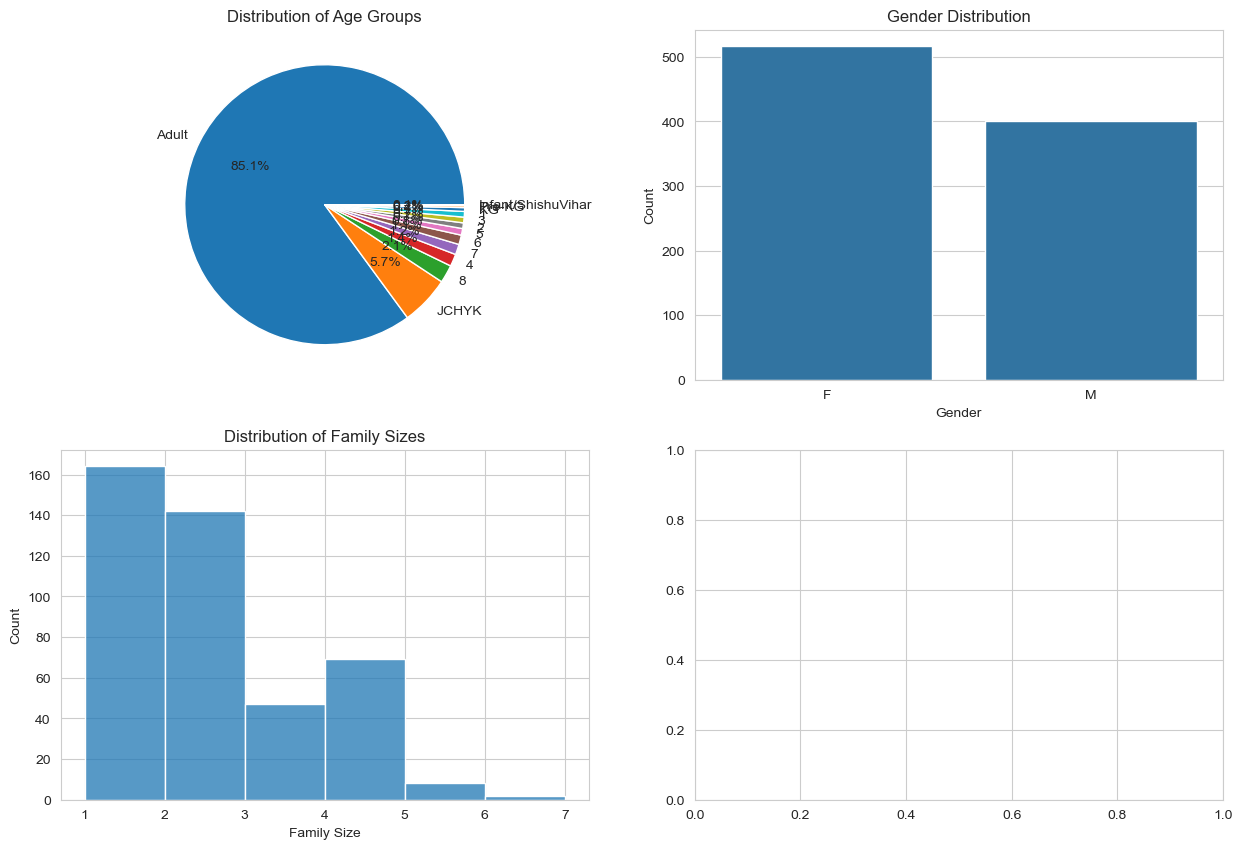

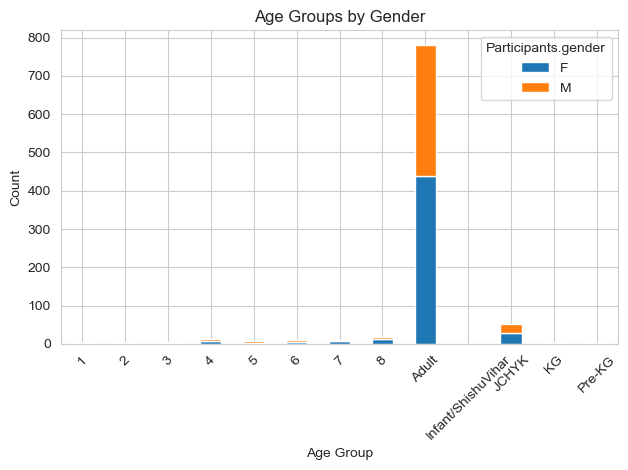


Summary Statistics:
Total number of participants: 917
Number of unique families: 432

Average family size: 2.1

Age Group Distribution:
Adult                 780
JCHYK                  52
8                      19
4                      13
7                      11
6                      10
5                       7
2                       6
3                       6
1                       6
KG                      4
Pre-KG                  2
Infant/ShishuVihar      1
Name: Category, dtype: int64

Gender Distribution:
F    516
M    401
Name: Participants.gender, dtype: int64


In [3]:


# Set style for better visualization
sns.set_style("whitegrid")

# Create figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Age Group Distribution
plt.subplot(2, 2, 1)
age_counts = df['Category'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')

# 2. Gender Distribution
plt.subplot(2, 2, 2)
gender_counts = df['Participants.gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Family Size Distribution
plt.subplot(2, 2, 3)
family_sizes = df.groupby('Family ID').size()
sns.histplot(family_sizes, bins=range(1, max(family_sizes)+2))
plt.title('Distribution of Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Count')

# 4. Age Group by Gender
plt.subplot(2, 2, 4)
age_gender = pd.crosstab(df['Category'], df['Participants.gender'])
age_gender.plot(kind='bar', stacked=True)
plt.title('Age Groups by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
print(f"Total number of participants: {len(df)}")
print(f"Number of unique families: {df['Family ID'].nunique()}")
print(f"\nAverage family size: {len(df)/df['Family ID'].nunique():.1f}")
print("\nAge Group Distribution:")
print(df['Category'].value_counts())
print("\nGender Distribution:")
print(df['Participants.gender'].value_counts())


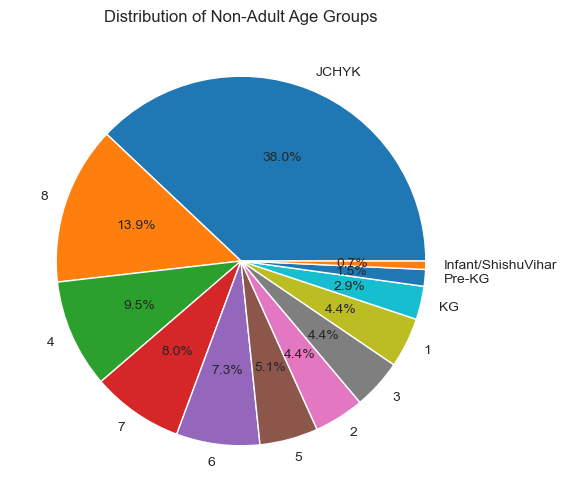


Non-Adult Age Distribution:
JCHYK                 52
8                     19
4                     13
7                     11
6                     10
5                      7
2                      6
3                      6
1                      6
KG                     4
Pre-KG                 2
Infant/ShishuVihar     1
Name: Category, dtype: int64


In [4]:
# Filter out Adults and analyze remaining age distribution
non_adults = df[df['Category'] != 'Adult']
non_adult_dist = non_adults['Category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(non_adult_dist, labels=non_adult_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Non-Adult Age Groups')
plt.show()

print("\nNon-Adult Age Distribution:")
print(non_adult_dist)


In [5]:
# Count and display unique Family IDs
unique_families = df['Family ID'].nunique()
print(f"\nNumber of distinct families: {unique_families}")



Number of distinct families: 432


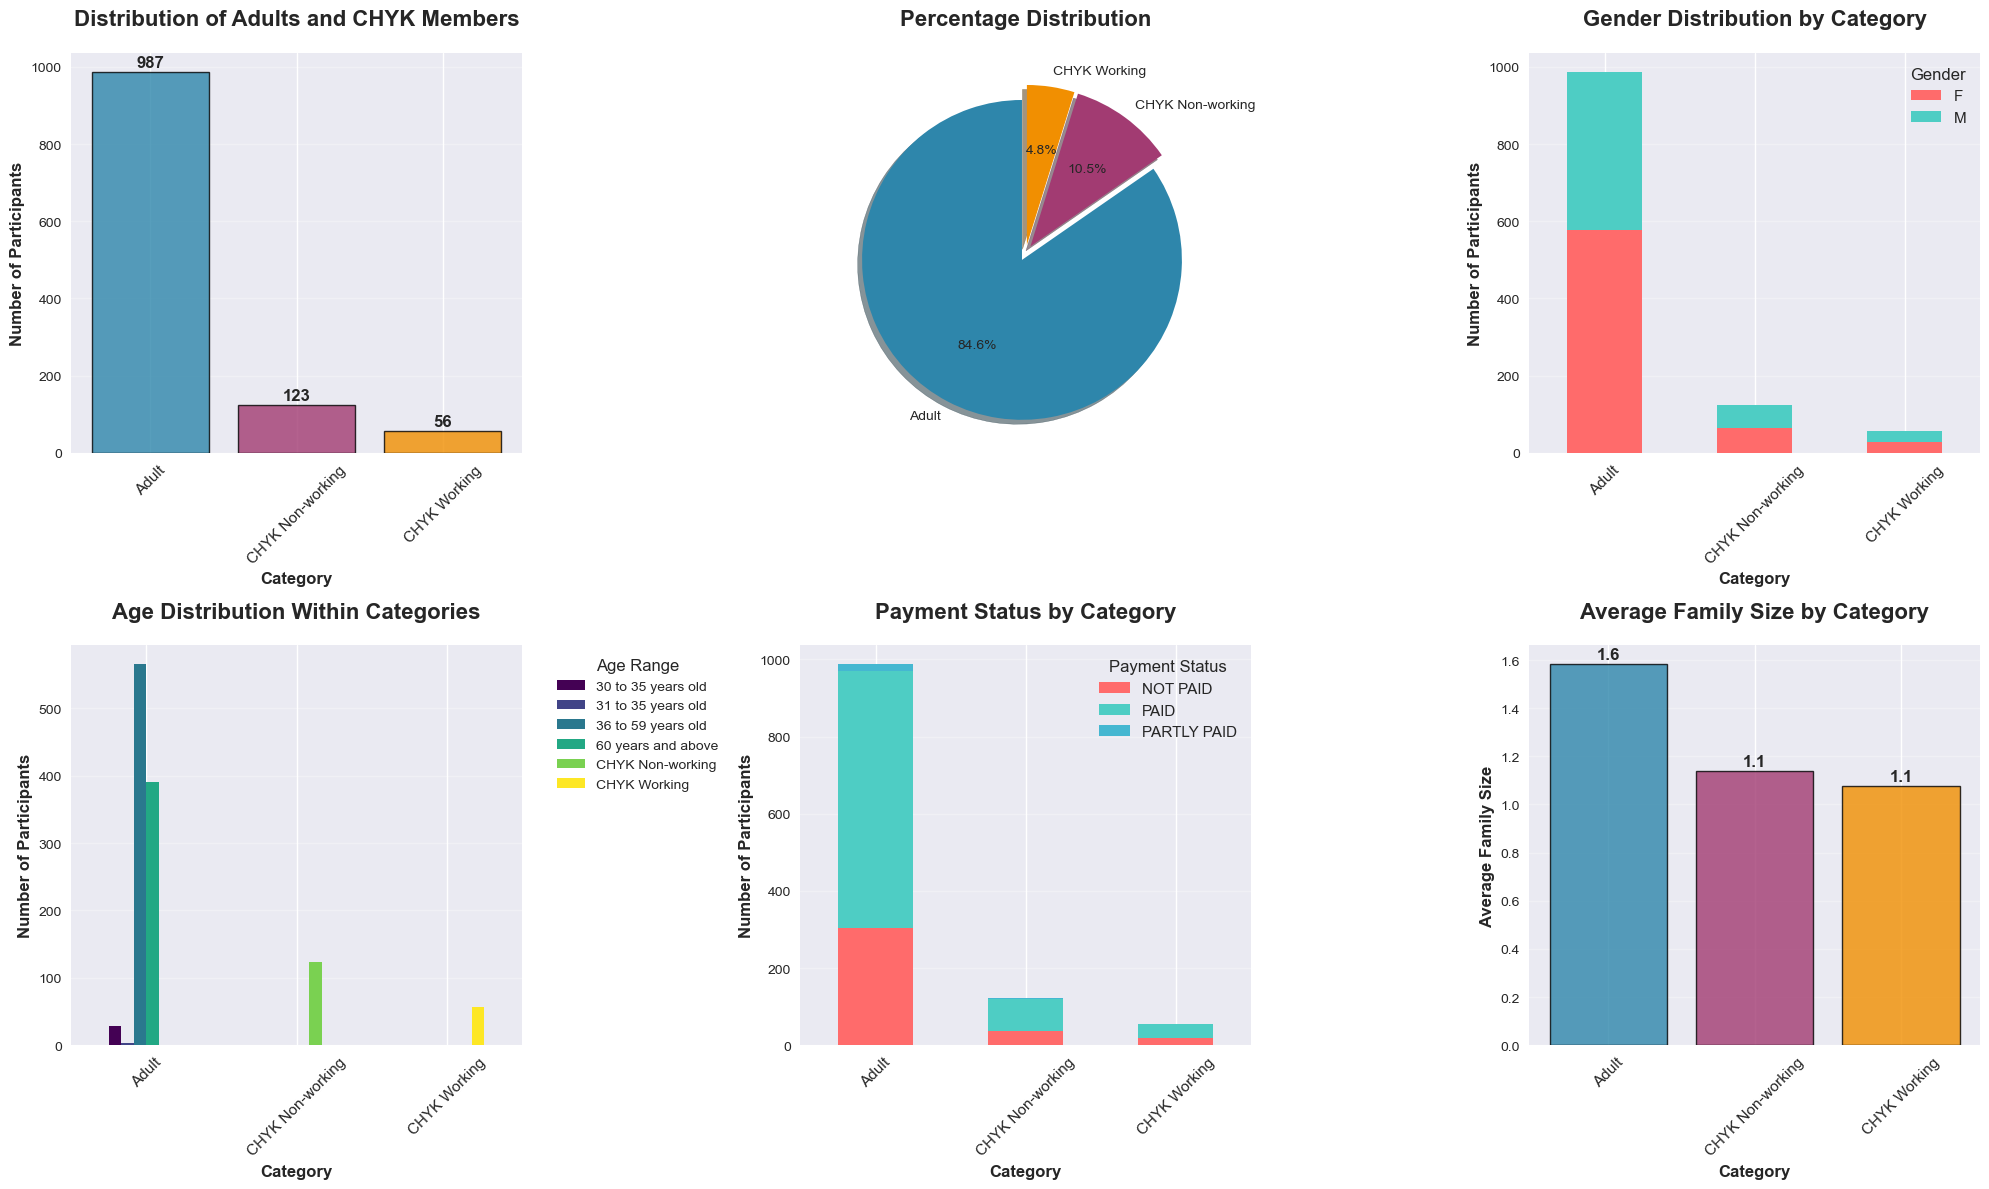

DETAILED ANALYSIS: Adults vs CHYK Members

📊 TOTAL PARTICIPANTS: 1,166
🏠 UNIQUE FAMILIES: 677

📈 CATEGORY BREAKDOWN:
   • Adult: 987 participants (84.6%)
   • CHYK Non-working: 123 participants (10.5%)
   • CHYK Working: 56 participants (4.8%)

👥 GENDER DISTRIBUTION BY CATEGORY:
   • Adult:
     - F: 578 (58.6%)
     - M: 409 (41.4%)
   • CHYK Non-working:
     - F: 65 (52.8%)
     - M: 58 (47.2%)
   • CHYK Working:
     - M: 29 (51.8%)
     - F: 27 (48.2%)

💰 PAYMENT STATUS BY CATEGORY:
   • Adult:
     - PAID: 665 (67.4%)
     - NOT PAID: 305 (30.9%)
     - PARTLY PAID: 17 (1.7%)
   • CHYK Non-working:
     - PAID: 84 (68.3%)
     - NOT PAID: 37 (30.1%)
     - PARTLY PAID: 2 (1.6%)
   • CHYK Working:
     - PAID: 35 (62.5%)
     - NOT PAID: 19 (33.9%)
     - PARTLY PAID: 2 (3.6%)

🏠 FAMILY SIZE ANALYSIS:
   • Adult: 624 families, avg size: 1.6
   • CHYK Non-working: 108 families, avg size: 1.1
   • CHYK Working: 52 families, avg size: 1.1



In [7]:
# Enhanced visualization for Adult, CHYK Working, and CHYK Non-Working categories
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the raw data
original_participants = pd.read_csv('./data/raw/participants3.csv')

# Filter for the specific categories we want
categories_of_interest = ['Adult', 'CHYK Non-working', 'CHYK Working']
filtered_df = original_participants[original_participants['Age Group'].isin(categories_of_interest)]

# Create count of each category
category_counts = filtered_df['Age Group'].value_counts()

# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create a comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Main Bar Chart with enhanced styling
plt.subplot(2, 3, 1)
colors = ['#2E86AB', '#A23B72', '#F18F01']
bars = plt.bar(category_counts.index, category_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Add value labels on top of each bar
for i, (bar, value) in enumerate(zip(bars, category_counts.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('Distribution of Adults and CHYK Members', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Participants', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', alpha=0.3)

# 2. Pie Chart with percentages
plt.subplot(2, 3, 2)
wedges, texts, autotexts = plt.pie(category_counts.values, labels=category_counts.index, 
                                  autopct='%1.1f%%', startangle=90, colors=colors,
                                  explode=(0.05, 0.05, 0.05), shadow=True)
plt.title('Percentage Distribution', fontsize=16, fontweight='bold', pad=20)

# 3. Gender breakdown by category
plt.subplot(2, 3, 3)
gender_category = pd.crosstab(filtered_df['Age Group'], filtered_df['Participants.gender'])
gender_category.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Gender Distribution by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Participants', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.legend(title='Gender', title_fontsize=12, fontsize=11)
plt.grid(axis='y', alpha=0.3)

# 4. Age distribution within categories (using Grade/Age Category)
plt.subplot(2, 3, 4)
age_category = filtered_df.groupby(['Age Group', 'Grade/Age Category']).size().unstack(fill_value=0)
age_category.plot(kind='bar', ax=plt.gca(), colormap='viridis')
plt.title('Age Distribution Within Categories', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Participants', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.legend(title='Age Range', title_fontsize=12, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# 5. Payment status by category
plt.subplot(2, 3, 5)
payment_category = pd.crosstab(filtered_df['Age Group'], filtered_df['PAID'])
payment_category.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], ax=plt.gca())
plt.title('Payment Status by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Participants', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.legend(title='Payment Status', title_fontsize=12, fontsize=11)
plt.grid(axis='y', alpha=0.3)

# 6. Family size distribution by category
plt.subplot(2, 3, 6)
family_sizes = filtered_df.groupby('Family ID').size()
family_category = filtered_df[filtered_df['Family ID'].isin(family_sizes.index)].groupby(['Age Group', 'Family ID']).size().reset_index()
family_category.columns = ['Age Group', 'Family ID', 'Count']
family_category = family_category.groupby('Age Group')['Count'].mean()

bars = plt.bar(family_category.index, family_category.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
for i, (bar, value) in enumerate(zip(bars, family_category.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('Average Family Size by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Average Family Size', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=11)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=" * 60)
print("DETAILED ANALYSIS: Adults vs CHYK Members")
print("=" * 60)

print(f"\n📊 TOTAL PARTICIPANTS: {len(filtered_df):,}")
print(f"🏠 UNIQUE FAMILIES: {filtered_df['Family ID'].nunique():,}")

print(f"\n📈 CATEGORY BREAKDOWN:")
for category, count in category_counts.items():
    percentage = (count / len(filtered_df)) * 100
    print(f"   • {category}: {count:,} participants ({percentage:.1f}%)")

print(f"\n👥 GENDER DISTRIBUTION BY CATEGORY:")
for category in categories_of_interest:
    category_data = filtered_df[filtered_df['Age Group'] == category]
    if len(category_data) > 0:
        gender_dist = category_data['Participants.gender'].value_counts()
        print(f"   • {category}:")
        for gender, count in gender_dist.items():
            percentage = (count / len(category_data)) * 100
            print(f"     - {gender}: {count:,} ({percentage:.1f}%)")

print(f"\n💰 PAYMENT STATUS BY CATEGORY:")
for category in categories_of_interest:
    category_data = filtered_df[filtered_df['Age Group'] == category]
    if len(category_data) > 0:
        payment_dist = category_data['PAID'].value_counts()
        print(f"   • {category}:")
        for status, count in payment_dist.items():
            percentage = (count / len(category_data)) * 100
            print(f"     - {status}: {count:,} ({percentage:.1f}%)")

print(f"\n🏠 FAMILY SIZE ANALYSIS:")
for category in categories_of_interest:
    category_data = filtered_df[filtered_df['Age Group'] == category]
    if len(category_data) > 0:
        unique_families = category_data['Family ID'].nunique()
        avg_family_size = len(category_data) / unique_families
        print(f"   • {category}: {unique_families:,} families, avg size: {avg_family_size:.1f}")

print("\n" + "=" * 60)